In [1]:
%pylab inline
%matplotlib inline
import pandas as pd

df=pd.read_pickle('data/paths.pkl.xz')

Populating the interactive namespace from numpy and matplotlib


In [2]:
df_by_obj = df.set_index(['filename', 'obj']).sort_index()
df_by_obj.head(5)

frame    x    y      size  seq  \
filename                        obj                                   
-16\20170820143029_100.h264.txt 22   11103  411   65   8854504   10   
.h264.txt                       4     4512  457   50  47016176    6   
                                13   11167  399   94  38964256  168   
0.h264.txt                      39    9911  198  176  90846208   14   
0003141_100.h264.txt            6     3283  399   77   8523664  169   

                                                   time  areas  
filename                        obj                             
-16\20170820143029_100.h264.txt 22  2017-08-20 14:31:09   16.0  
.h264.txt                       4   2017-08-20 16:51:53   17.0  
                                13  2017-08-23 10:46:30   26.0  
0.h264.txt                      39  2017-08-24 08:52:55   43.0  
0003141_100.h264.txt            6   2017-08-20 00:33:52   26.0

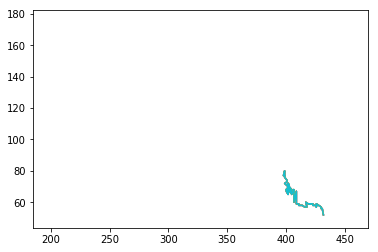

In [3]:
data_a=df_by_obj[(df_by_obj.x.between(411,460))&df_by_obj.y.between(49,100)]
top10=df_by_obj.head(10)

for t in top10.index:
    oo = df_by_obj.loc[t]
    plot(oo.x, oo.y, label="")


In [4]:
def draw_path(to_draw):
    print("in draw")
    img=imread("paths0.png")
    imshow(img)
    df_by_obj = df.set_index(['filename', 'obj']).sort_index()
    for t in to_draw.index:
       oo = df_by_obj.loc[t]
       plot(oo.x, oo.y)

In [16]:
%%time
def filter_by_area(x0,x1,y0,y1):
    df_by_obj = df.set_index(['filename', 'obj']).sort_index()
    data_a=df_by_obj[(df_by_obj.x.between(x0,x1)) & (df_by_obj.y.between(y0,y1))]
    print(len(data_a))
    draw_path(data_a)
    

Wall time: 0 ns


8397
in draw
Wall time: 1min 57s


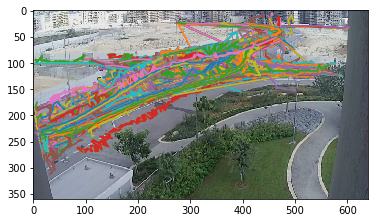

In [17]:
%%time
filter_by_area(420,430,59,64)

In [7]:
# def filter_by_aresdgdas(areas):
#     len_areas=len(areas)
#     df_by_obj = df.set_index(['filename', 'obj']).sort_index()
#     filter_con=f"(df_by_obj.x.between({areas[0][0]},{areas[0][1]})) & (df_by_obj.y.between({areas[0][2]},{areas[0][3]}))"

#     for i in range(1, len_areas):    
#         filter_con += f"|(df_by_obj.x.between({areas[i][0]},{areas[i][1]})) & (df_by_obj.y.between({areas[i][2]},{areas[i][3]}))"

#     if len_areas > 1:
#         filter_con = f"({filter_con}"
#         filter_con += ")"
#     data_a=df_by_obj[filter_con]
#     draw_path(data_a)
    

2997979
in draw
Wall time: 9.38 s


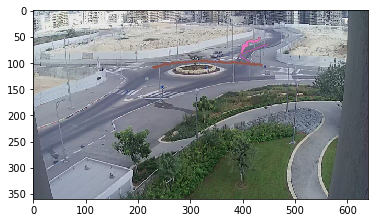

In [8]:
%%time
print(len(df_by_obj))
def filter_by_areas(areas_s):
    areas = np.array(areas_s)
    df_by_obj = df.set_index(['filename', 'obj']).sort_index().head(1000)
    data_as=df_by_obj[df_by_obj.areas.isin(areas)]
    draw_path(data_as)
filter_by_areas([12,25,26,28,45])  

In [9]:
# x_squares, y_squares = 5 , 2
# img=imread("paths0.png")
# h, w = img.shape[:2]
# w_delta,h_delta=w/x_squares,h/y_squares
# ab='ABCDEFGHIJKLMNOPQRSTUVWXYZ'
# areas_dict={}

# for y in range(y_squares):
#     for x in range(x_squares):
#         areas_dict[ab[x + y*x_squares]]={'x':(x*w_delta,x*w_delta + w_delta),'y':(y*h_delta,y*h_delta+h_delta)}
# areas_dict




In [10]:
df_by_obj = df.set_index(['filename', 'obj']).sort_index().head(8000)
data_as=df_by_obj[df_by_obj.areas.isin([1,2,3,4,5,20,25,85])]
list(data_as.index.unique())
indexs=list(data_as.index.unique())
last_data=df_by_obj[df_by_obj.index.isin(indexs)]
len(last_data)

1440

In [11]:
def set_last_data(data_to_set):
    df_by_obj = df.set_index(['filename', 'obj']).sort_index().head(8000)
    indexs=list(data_to_set.index.unique())
    last_data=df_by_obj[df_by_obj.index.isin(indexs)]
    last_data
    

In [12]:
def filter_by_hours(self, begin, end):
    objs = self.last.groupby(["filename", "obj"]).agg({'time': ['min', 'max']})
    begin_time = pd.to_datetime(begin).time()
    end_time = pd.to_datetime(end).time()
    min = objs.time['min'].dt.time  # objs[('time','min')]
    max = objs.time['max'].dt.time  # objs[('time','max')]
    # print(min, max)
    items = objs[(min.between(begin_time, end_time)) | ((min < begin_time) & (max > begin_time))]
    # print(items)
    self.last = items
    print(len(items))
    return self.to_arrays(items)


In [13]:
# objs = df.groupby(["filename", "obj"]).agg({'time': ['min', 'max']})
# begin_time = pd.to_datetime("8:00").time()
# end_time = pd.to_datetime("10:00").time()
# min = objs.time['min'].dt.time  # objs[('time','min')]
# max = objs.time['max'].dt.time  # objs[('time','max')]
# # print(min, max)
# items = objs[(min.between(begin_time, end_time)) | ((min < begin_time) & (max > begin_time))]
# # print(items)

# print(len(items))
# list(items.index.unique())

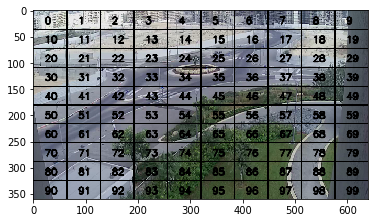

In [18]:
import cv2
size = 10
i=0
ab=range(size*size)
im = cv2.imread("paths0.png", 1)
h, w = im.shape[:2]
font = cv2.FONT_HERSHEY_SIMPLEX
dx,dy=w//size, h//size
for y in range(size):
    for x in range(size):
        x_place,y_place=int((x*dx + dx/2)-size),int(y*dy +dy-size)
        cv2.putText(im,str(ab[i]),(x_place,y_place), font, 0.6, (0,0,0), 2, cv2.LINE_AA)
        i+=1  

for i in range(dy, h, dy):
       im[i:i + 2, :] = 0
for i in range(dx, w, dx):
       im[:, i:i + 2] = 0
cv2.imwrite("grid_img.png", im)
img=imread("grid_img.png")
imshow(img)


In [ ]:
def draw_grid(self):
       print("in grid")
       img =self.img
       h, w = img.shape[:2]
       dx = w // 10
       dy = h // 10
       for i in range(dy, h, dy):
           img[i:i + 2, :] = 0
       for i in range(dx, w, dx):
           img[:, i:i + 2] = 0
       imshow(img)
       show()